In [203]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from general import rgb2gray
from general import alpha2rgb
from segmentacion.otsu import thresholdOtsu
from formas_binarias import detectar_bordes_binarios
from formas_binarias import ErosionBin
from bordes import bettle
from bordes import primer1
from bordes import replaceColor

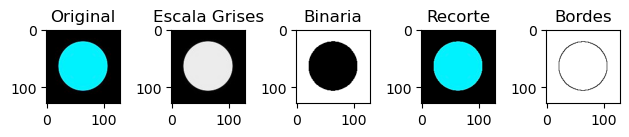

In [204]:
image2 = cv2.imread('imagenesPruebas/circle1.png')
imgGray = rgb2gray(image2)
binary = thresholdOtsu(imgGray)
masked = np.zeros_like(image2)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(image2.shape[1]):
    for j in range(image2.shape[0]):
        if 1-binary[j, i] == 0:
            masked[j, i, :] = image2[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image2)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()

In [205]:
# Matriz de prueba parecida a la del ejercicio de clase
a = 0
b = 1
test = np.array([[a, a, a, a, a, a, a, a, a, a, a],
                [a, a, a, a, a, a, b, a, a, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, a, a, a, b, b, b, a, a],
                [a, a, a, a, a, a, b, b, b, a, a],
                [a, a, a, a, a, a, b, b, b, a, a],
                [a, a, a, a, a, b, b, b, b, a, a],
                [a, a, a, a, b, b, b, b, b, b, a],
                [a, a, a, b, b, b, b, b, b, b, a],
                [a, a, a, b, b, b, b, b, b, b, a],
                [a, a, a, b, b, b, b, b, b, a, a],
                [a, a, a, b, b, b, b, b, b, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, b, b, b, b, a, a, a, a],
                [a, a, a, b, b, a, a, a, a, a, a],
                [a, a, a, b, a, a, a, a, a, a, a],
                [a, a, a, a, a, a, a, a, a, a, a]])

In [206]:
print(primer1(test))

(1, 6)


In [207]:
def obtenerCuadrante(punto, image):
    ancho_total = image.shape[1]
    alto_total = image.shape[0]
    x, y = punto[1], punto[0]  
    if x < ancho_total / 2 and y < alto_total / 2:
        return 2
    elif x >= ancho_total / 2 and y < alto_total / 2:
        return 1
    elif x < ancho_total / 2 and y >= alto_total / 2:
        return 4
    elif x >= ancho_total / 2 and y >= alto_total / 2:
        return 3
    else:
        return "No se encuentra en ningún cuadrante"
def FreemanChain(imgBinaria, conexion):
    start = primer1(imgBinaria)
    print(start)
    currentP = start
    chainResult = []
    border = [] 
    result =np.zeros_like(imgBinaria)
    result[start] = 1
    if conexion == 8:
        directions = [3, 2, 1, 
                      4,    0,
                      5, 6, 7] 
        movimiento = [(-1, -1),(-1, 0),(-1, 1),
                       (0, -1),         (0,1),
                       (1, -1),(1, 0), (1, 1)]
        DIRECL= [2, 1, 0, 7, 6, 5, 4, 3]
        movsL = [(-1, 0),(-1, 1), (0,1),(1, 1),(1, 0), (1, -1),(0, -1),(-1, -1)]
        DIRECR= [6, 5, 4, 3, 2, 1,0, 7 ]
        movsR = [(1, 0), (1, -1),(0, -1),(-1, -1),(-1, 0),(-1, 1), (0,1),(1, 1)]
        dir4 = [4, 3, 2, 1, 0, 7, 6, 5]
        mov4 = [(0, -1),(-1, -1),(-1, 0),(-1, 1),(0,1),(1, 1),(1, 0), (1, -1)]
    elif conexion == 4:
        directions = [   1, 
                      2,    0,
                         3] 
        movimiento = [     (-1, 0),
                    (0, -1),      (0,1),
                            (1, 0)]
        DIRECL = [0, 3, 2, 1]
        movsL = [(0,1),(1, 0),(0, -1),(-1, 0)] 
        DIRECR = [3, 2, 1, 0]
        movsR = [(1, 0),(0, -1),(-1, 0),(0,1)] 
    diccionario_movimientosL = dict(zip(DIRECL, movsL))  
    diccionario_movimientosR = dict(zip(DIRECR, movsR))
    dicc4 = dict(zip(dir4, mov4))
    
    diccActual = diccionario_movimientosL.copy()
    while True:
        for direction, mov in diccActual.items():
            print(direction, mov)
            next_mov = (currentP[0] + mov[0], currentP[1] + mov[1])
            print(next_mov)
            if 0 <= next_mov[0] < imgBinaria.shape[0] and 0 <= next_mov[1] < imgBinaria.shape[1]:
                print('el valor en ', next_mov, ' es ', imgBinaria[next_mov])
                if imgBinaria[next_mov] == 1 and result[next_mov] == 0:
                    print(next_mov)
                    border.append(next_mov)
                    chainResult.append(dir)
                    currentP = next_mov
                    result[next_mov] = 1
                    plt.imshow(result, cmap='binary')
                    plt.grid(True)
                    plt.xticks(np.arange(0.5, result.shape[1]+0.5, 1))
                    plt.yticks(np.arange(0.5, result.shape[0]+0.5, 1))
                    plt.show()
                    break;
        print('hay que comparar ', currentP, start)        
        if currentP == start: 
            break
        else:
            cuadrante = obtenerCuadrante(currentP, imgBinaria)
            print('cuadrante:', cuadrante)
            if cuadrante == 1:
                diccActual = diccionario_movimientosL
            elif cuadrante == 4:
                diccActual = diccionario_movimientosR
            elif cuadrante == 3:
                diccActual = diccionario_movimientosR
            elif cuadrante == 2:
                diccActual = dicc4
    return chainResult, border

In [208]:
def obtenerCuadrante(punto, image):
    ancho_total = image.shape[1]
    alto_total = image.shape[0]
    x, y = punto[1], punto[0]  
    if x < ancho_total / 2 and y < alto_total / 2:
        #superior izquierda
        return 2
    elif x >= ancho_total / 2 and y < alto_total / 2:
        #superior derecha
        return 1
    elif x < ancho_total / 2 and y >= alto_total / 2:
        #inferior izquierda
        return 3
    elif x >= ancho_total / 2 and y >= alto_total / 2:
        #inferior derecha
        return 4
    else:
        return "No se encuentra en ningún cuadrante"
def FreemanChain(imgBinaria, conexion):
    start = primer1(imgBinaria)
    print(start)
    currentP = start
    chainResult = []
    border = [] 
    result =np.zeros_like(imgBinaria)
    result[start] = 1
    if conexion == 8:
        directions = [3, 2, 1, 
                      4,    0,
                      5, 6, 7] 
        movimiento = [(-1, -1),(-1, 0),(-1, 1),
                       (0, -1),         (0,1),
                       (1, -1),(1, 0), (1, 1)]
        direc1 = [2, 1, 0, 7, 6, 5, 4, 3]
        movs1 = [(-1, 0),(-1, 1),(0,1), (1,1),(1, 0), (1, -1),(0, -1),(-1, -1)]
        direc4 =[0, 7,6,5,4,3,2,1]
        movs4 = [(0,1), (1, 1), (1, 0),(1, -1),(0, -1),(-1, -1),(-1, 0),(-1, 1)]
        direc3 =[6, 5, 4, 3, 2, 1, 0, 7] 
        movs3 = [(1, 0),(1, -1),(0, -1),(-1, -1),(-1, 0),(-1, 1), (0,1),(1, 1)] 
        direc2 = [4, 3, 2, 1, 0, 7, 6, 5]
        movs2 = [(0, -1),(-1, -1),(-1, 0),(-1, 1), (0,1),(1, 1), (1, 0),(1, -1)]        
        
    elif conexion == 4:
        directions = [   1, 
                      2,    0,
                         3] 
        movimiento = [     (-1, 0),
                    (0, -1),      (0,1),
                            (1, 0)]
        direc1 = [1, 0, 3, 2]
        movs1 = [(-1,0), (0,1), (1,0), (0, -1)]
        direc2 =[3,2,1,0]
        movs2 = [(1,0), (0, -1), (-1,0), (0,1)]
        direc3 = [0, 3, 2, 1]
        movs3 = [(0,1), (1, 0), (0, -1), (-1, 0)]
        direc4 = direc3.copy()
        movs4 = movs3.copy()
    dicc1 = dict(zip(direc1, movs1))
    dicc2 = dict (zip(direc2, movs2))
    dicc3 = dict(zip(direc3, movs3))
    dicc4 =dict(zip(direc4, movs4))
    cuadrante = obtenerCuadrante(currentP, imgBinaria)
    diccActual = dicc1.copy()
    consecutive_empty_moves = 0  # Variable para contar las iteraciones consecutivas sin agregar un nuevo elemento a chainResult

    while True:
        added_to_chain = False  # Variable para verificar si se agregó un elemento a chainResult en la iteración actual
        for direction, mov in diccActual.items():
            next_mov = (currentP[0] + mov[0], currentP[1] + mov[1])
            if 0 <= next_mov[0] < imgBinaria.shape[0] and 0 <= next_mov[1] < imgBinaria.shape[1]:
                if imgBinaria[next_mov] == 1 and result[next_mov] == 0:
                    border.append(next_mov)
                    chainResult.append(direction)
                    currentP = next_mov
                    result[next_mov] = 1
                    added_to_chain = True
                    consecutive_empty_moves = 0  # Reiniciar el contador si se agrega un punto a chainResult
                    plt.imshow(result, cmap='binary')
                    plt.grid(True)
                    plt.xticks(np.arange(0.5, result.shape[1]+0.5, 1))
                    plt.yticks(np.arange(0.5, result.shape[0]+0.5, 1))
                    plt.show()
                    break
                else:
                    consecutive_empty_moves += 1  # Incrementar el contador si el punto no se agrega a chainResult
        if consecutive_empty_moves > 10:  # Agregar una condición de parada adicional si no se ha agregado nada al chainResult durante 10 iteraciones
            break
        else:
            cuadrante = obtenerCuadrante(currentP, imgBinaria)
            if cuadrante == 1:
                diccActual = dicc1
            elif cuadrante == 4:
                diccActual = dicc4
            elif cuadrante == 3:
                diccActual = dicc3
            elif cuadrante == 2:
                diccActual = dicc2
    return chainResult, border

(1, 6)


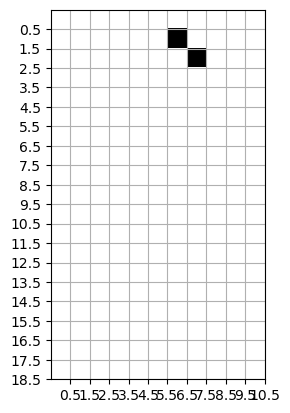

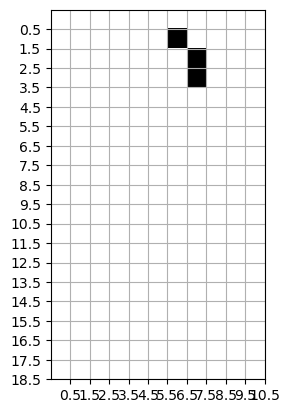

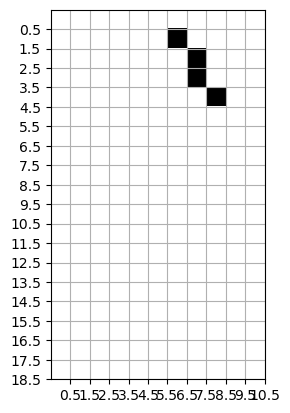

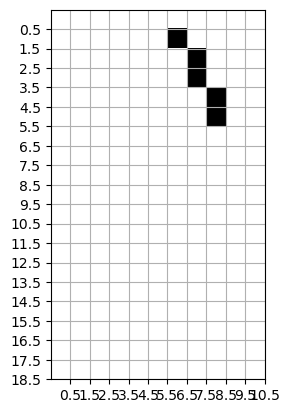

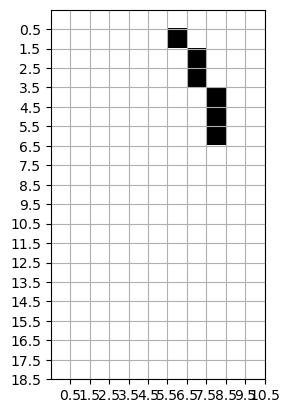

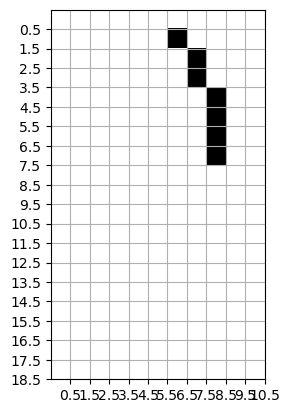

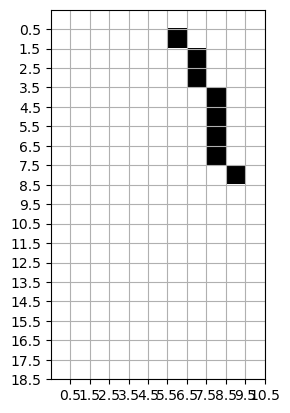

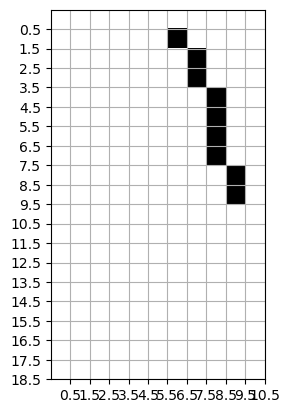

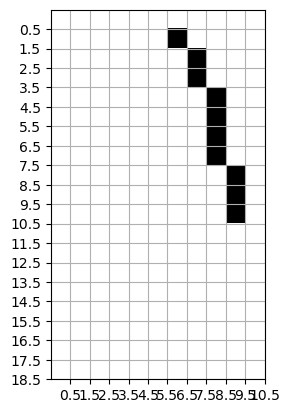

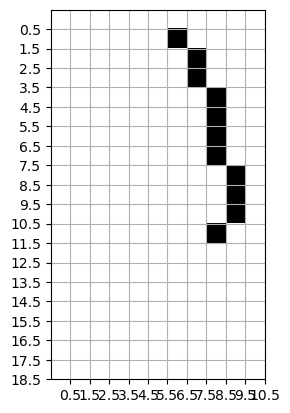

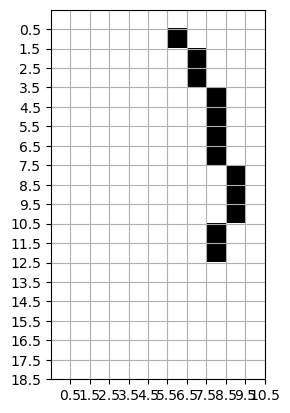

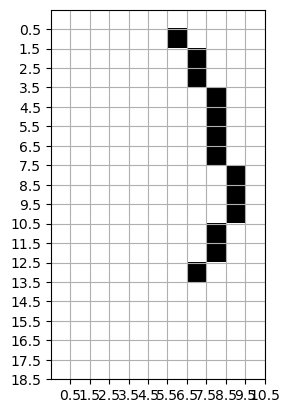

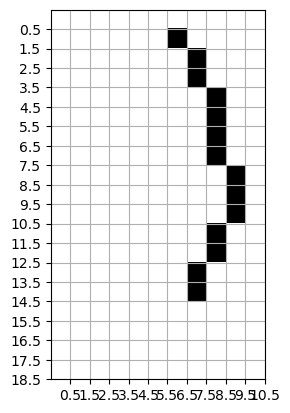

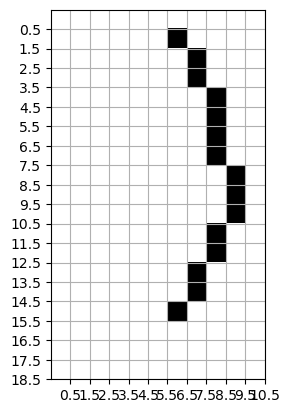

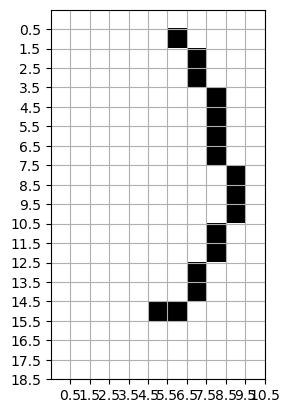

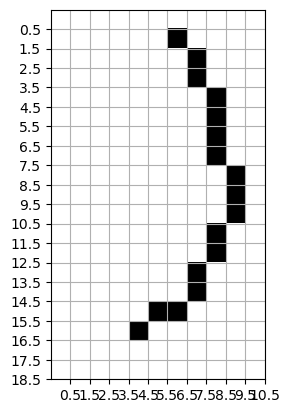

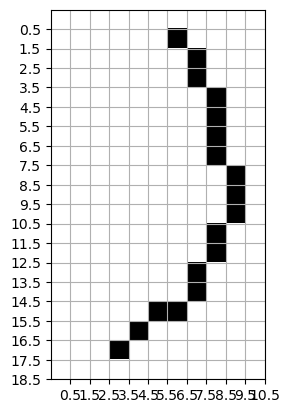

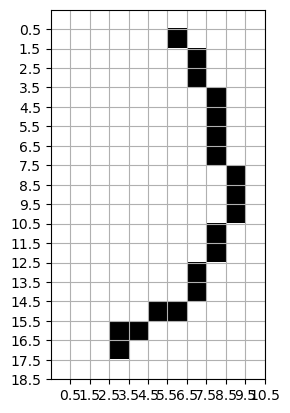

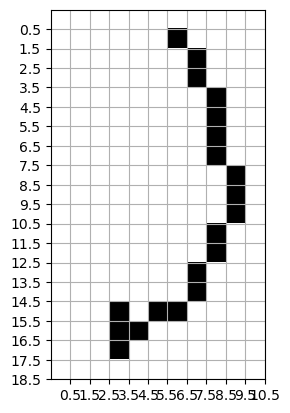

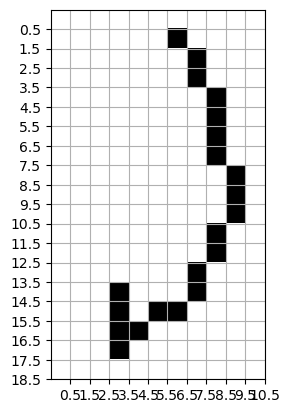

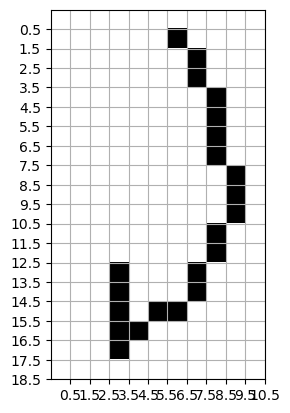

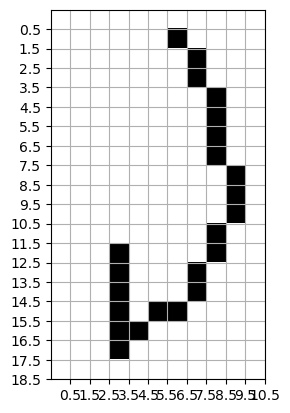

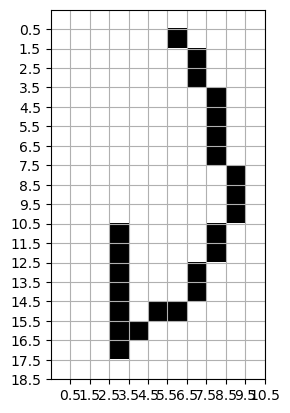

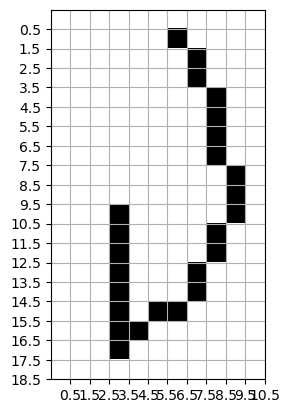

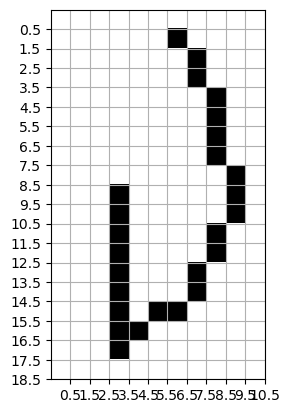

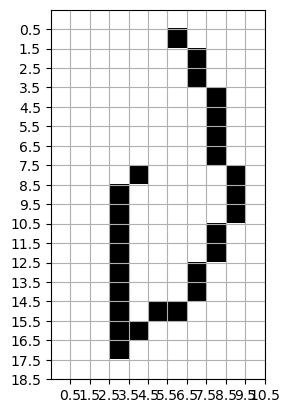

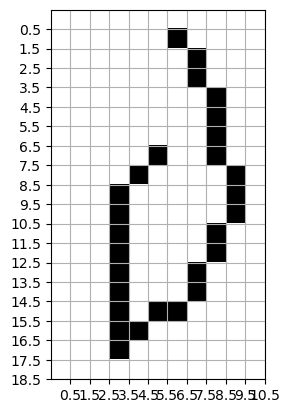

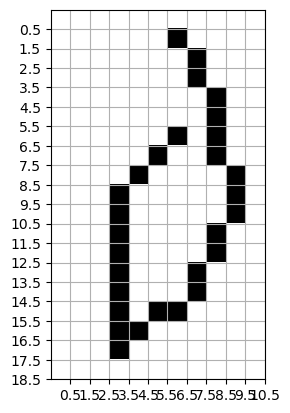

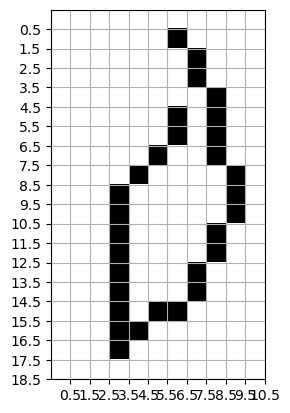

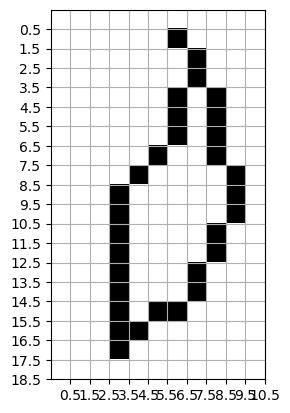

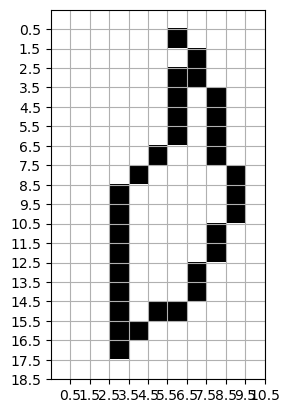

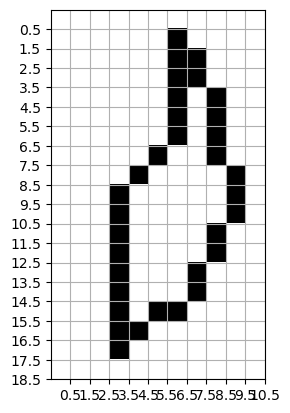

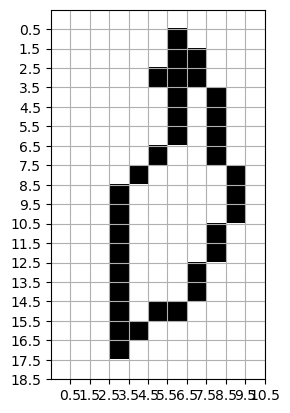

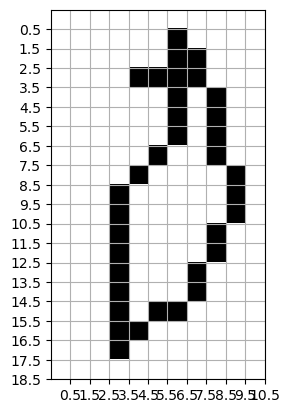

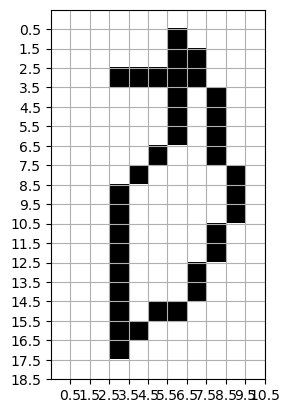

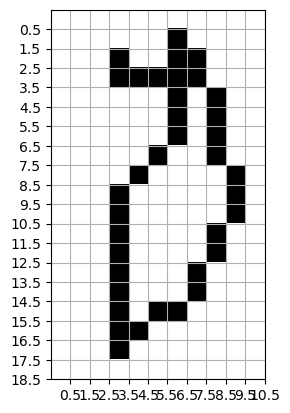

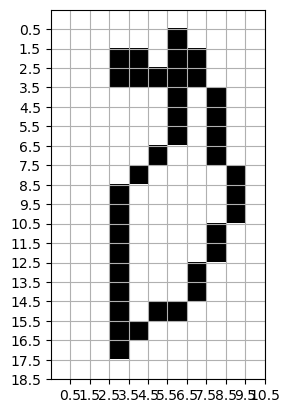

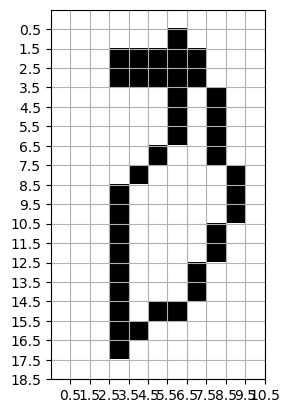

In [209]:
chain8, border8 = FreemanChain(test, 8)

In [210]:
print(chain8)
print(border8)

[7, 6, 7, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 4, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 5, 4, 4, 2, 0, 0]
[(2, 7), (3, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 9), (9, 9), (10, 9), (11, 8), (12, 8), (13, 7), (14, 7), (15, 6), (15, 5), (16, 4), (17, 3), (16, 3), (15, 3), (14, 3), (13, 3), (12, 3), (11, 3), (10, 3), (9, 3), (8, 4), (7, 5), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (3, 5), (3, 4), (3, 3), (2, 3), (2, 4), (2, 5)]


(1, 6)


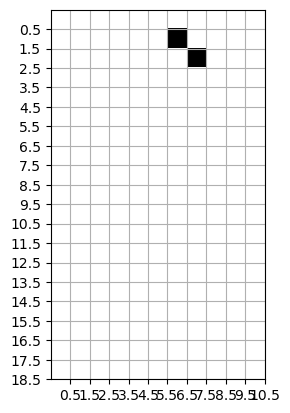

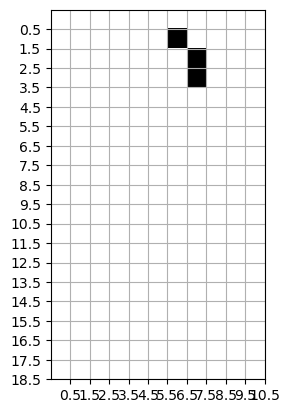

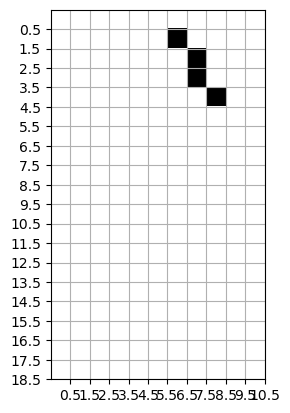

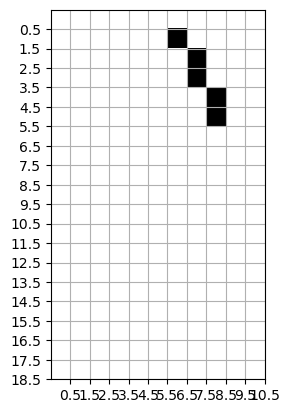

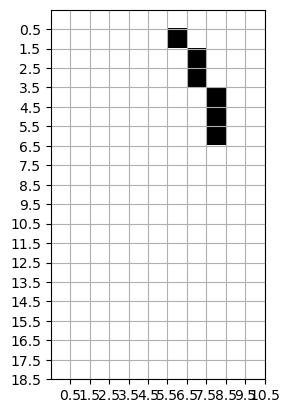

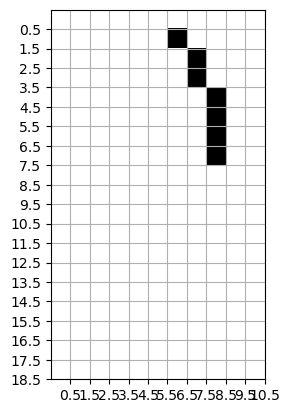

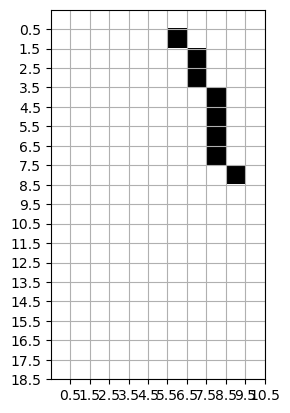

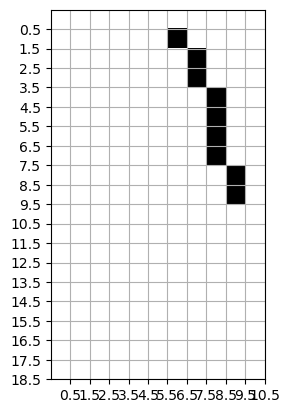

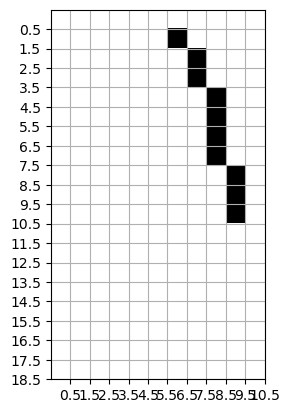

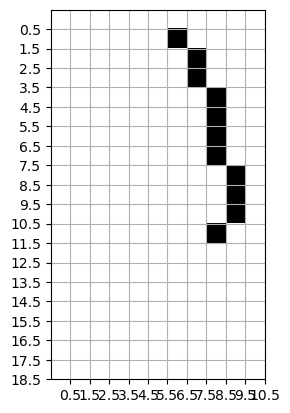

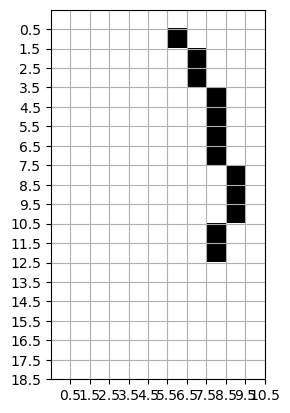

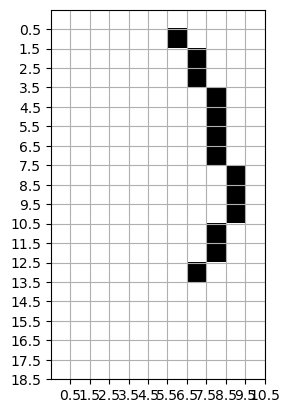

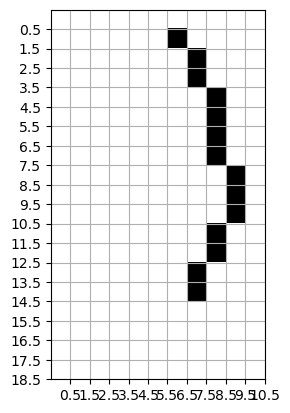

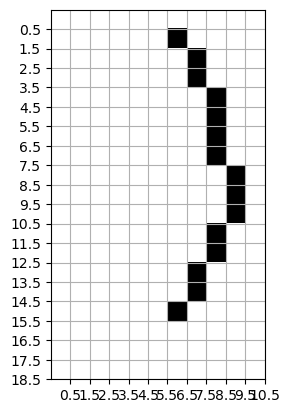

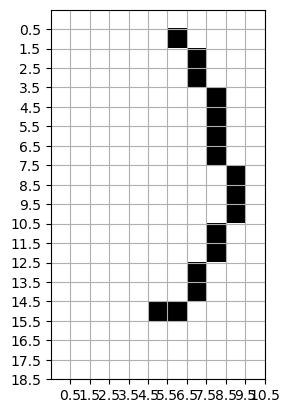

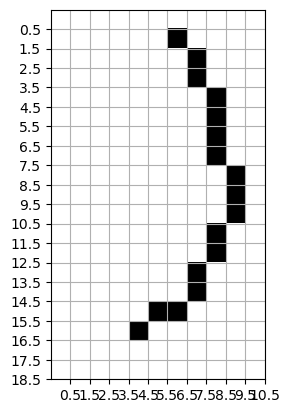

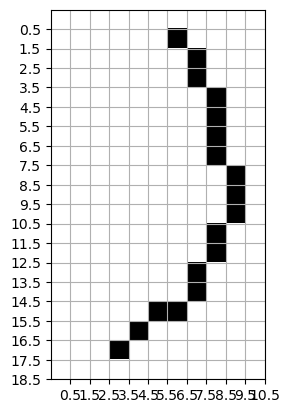

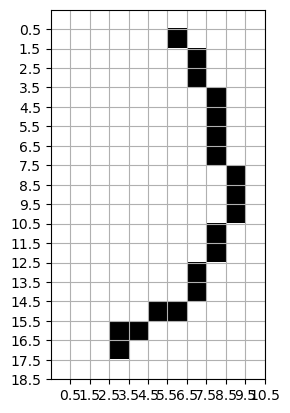

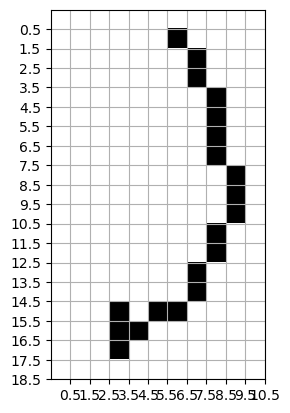

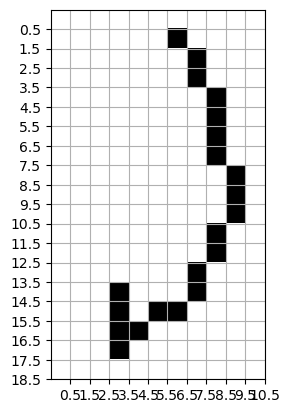

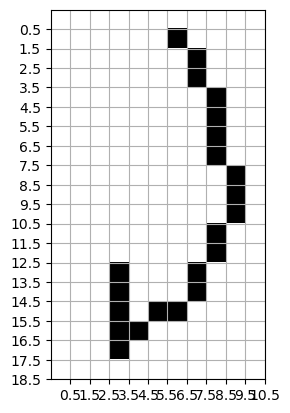

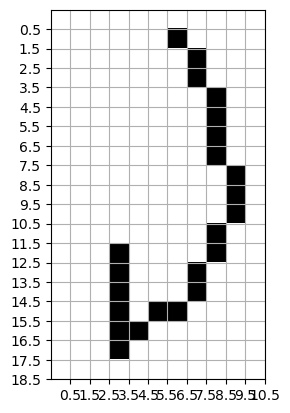

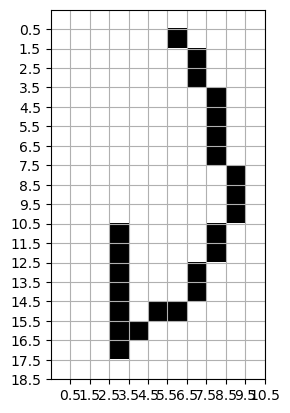

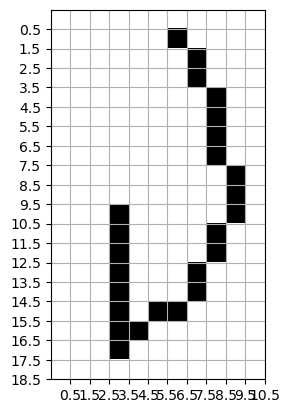

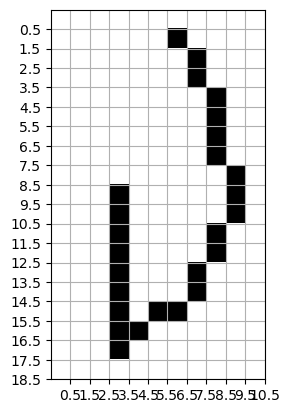

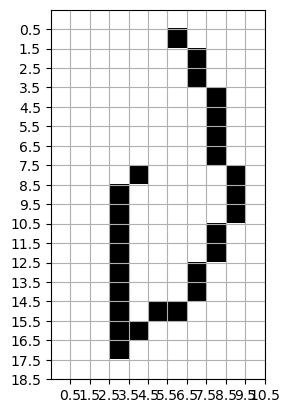

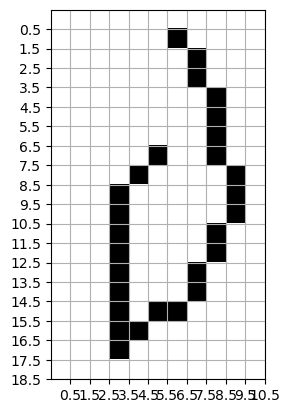

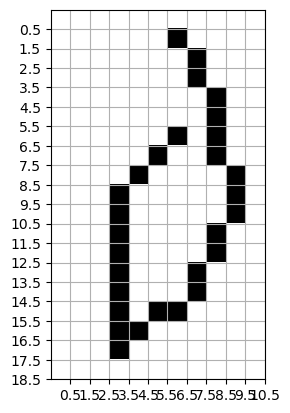

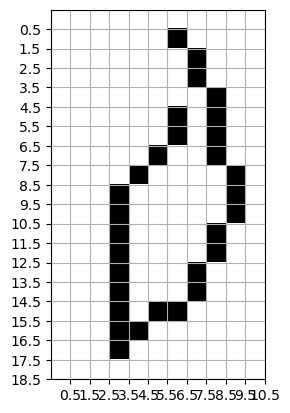

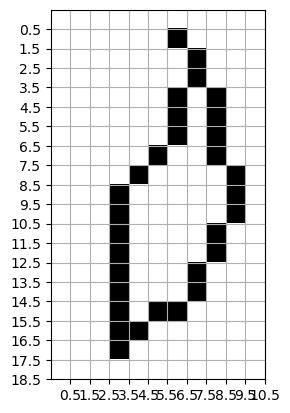

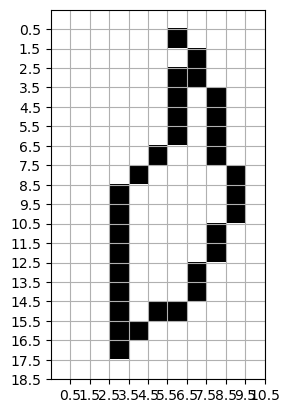

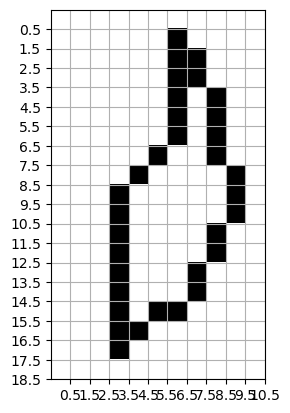

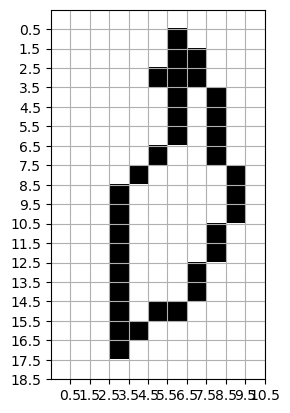

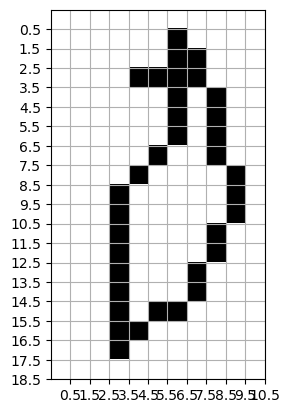

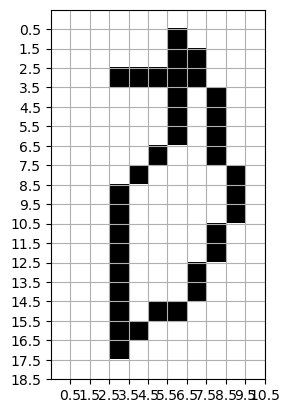

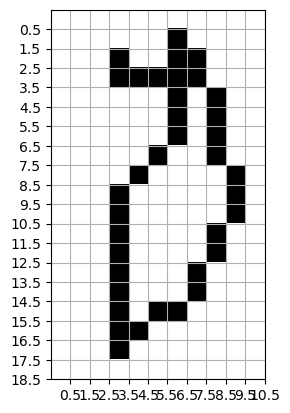

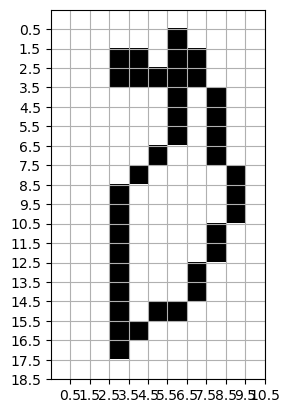

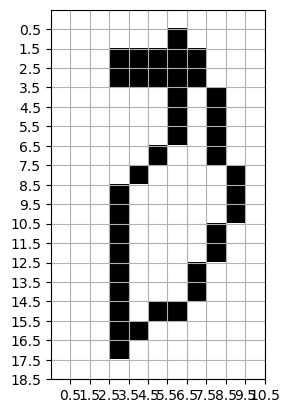

Border Points: [7, 6, 7, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 5, 4, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 5, 4, 4, 2, 0, 0]
Chain Points: [(2, 7), (3, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 9), (9, 9), (10, 9), (11, 8), (12, 8), (13, 7), (14, 7), (15, 6), (15, 5), (16, 4), (17, 3), (16, 3), (15, 3), (14, 3), (13, 3), (12, 3), (11, 3), (10, 3), (9, 3), (8, 4), (7, 5), (6, 6), (5, 6), (4, 6), (3, 6), (2, 6), (3, 5), (3, 4), (3, 3), (2, 3), (2, 4), (2, 5)]


In [213]:
a = 0
b = 1
test = np.array([[a, a, a, a, a, a, a, a, a, a, a],
                [a, a, a, a, a, a, b, a, a, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, a, a, a, b, b, b, a, a],
                [a, a, a, a, a, a, b, b, b, a, a],
                [a, a, a, a, a, a, b, b, b, a, a],
                [a, a, a, a, a, b, b, b, b, a, a],
                [a, a, a, a, b, b, b, b, b, b, a],
                [a, a, a, b, b, b, b, b, b, b, a],
                [a, a, a, b, b, b, b, b, b, b, a],
                [a, a, a, b, b, b, b, b, b, a, a],
                [a, a, a, b, b, b, b, b, b, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, b, b, b, b, b, a, a, a],
                [a, a, a, b, b, b, b, a, a, a, a],
                [a, a, a, b, b, a, a, a, a, a, a],
                [a, a, a, b, a, a, a, a, a, a, a],
                [a, a, a, a, a, a, a, a, a, a, a]])
border_points, chain_points = FreemanChain(test, 8)
print("Border Points:", border_points)
print("Chain Points:", chain_points)

In [250]:
import numpy as np

def obtenerCuadrante(punto, image):
    ancho_total = image.shape[1]
    alto_total = image.shape[0]
    x, y = punto[1], punto[0]  
    if x < ancho_total / 2 and y < alto_total / 2:
        #superior izquierda
        return 2
    elif x >= ancho_total / 2 and y < alto_total / 2:
        #superior derecha
        return 1
    elif x < ancho_total / 2 and y >= alto_total / 2:
        #inferior izquierda
        return 3
    elif x >= ancho_total / 2 and y >= alto_total / 2:
        #inferior derecha
        return 4
    else:
        return "No se encuentra en ningún cuadrante"

# Modificación de la función FreemanChain
def FreemanChain(imgBinaria, conexion):
    start = primer1(imgBinaria)  # No se proporciona la función primer1, deberías reemplazarla por tu propia implementación
    print(start)
    currentP = start
    chainResult = []
    border = [start]  # Se inicia con el primer punto en el borde
    result = np.zeros_like(imgBinaria)
    result[start] = 1
    if conexion == 8:
        directions = [3, 2, 1, 
                      4,    0,
                      5, 6, 7] 
        movimiento = [(-1, -1),(-1, 0),(-1, 1),
                       (0, -1),         (0,1),
                       (1, -1),(1, 0), (1, 1)]
        direc1 = [2, 1, 0, 7, 6, 5, 4, 3]
        movs1 = [(-1, 0),(-1, 1),(0,1), (1,1),(1, 0), (1, -1),(0, -1),(-1, -1)]
        direc4 =[0, 7,6,5,4,3,2,1]
        movs4 = [(0,1), (1, 1), (1, 0),(1, -1),(0, -1),(-1, -1),(-1, 0),(-1, 1)]
        direc3 =[6, 5, 4, 3, 2, 1, 0, 7] 
        movs3 = [(1, 0),(1, -1),(0, -1),(-1, -1),(-1, 0),(-1, 1), (0,1),(1, 1)] 
        direc2 = [4, 3, 2, 1, 0, 7, 6, 5]
        movs2 = [(0, -1),(-1, -1),(-1, 0),(-1, 1), (0,1),(1, 1), (1, 0),(1, -1)]   
        pass
    elif conexion == 4:
        directions = [   1, 
                      2,    0,
                         3] 
        movimiento = [     (-1, 0),
                    (0, -1),      (0,1),
                            (1, 0)]
        direc1 = [1, 0, 3, 2]
        movs1 = [(-1,0), (0,1), (1,0), (0, -1)]
        direc4 = [0, 3, 2, 1]
        movs4 = [(0,1), (1, 0), (0, -1), (-1, 0)]
        direc3 = [3,2,1,0]
        movs3 = [(1,0), (0, -1), (-1,0), (0,1)]
        direc2 =[2,1,0, 3]
        movs2 = [(0, -1), (-1,0), (0,1), (1,0)]
        pass
    
    dicc1 = dict(zip(direc1, movs1))
    dicc2 = dict(zip(direc2, movs2))
    dicc3 = dict(zip(direc3, movs3))
    dicc4 = dict(zip(direc4, movs4))
    cuadrante = obtenerCuadrante(currentP, imgBinaria)
    diccActual = dicc1.copy()
    consecutive_empty_moves = 0
    llego = False
    while True:
        added_to_chain = False
        for direction, mov in diccActual.items():
            next_mov = (currentP[0] + mov[0], currentP[1] + mov[1])
            if 0 <= next_mov[0] < imgBinaria.shape[0] and 0 <= next_mov[1] < imgBinaria.shape[1]:
                if imgBinaria[next_mov] == 1 and result[next_mov] != 0 and next_mov == start:
                    print('forzamos termino ')
                    llego = True
                if imgBinaria[next_mov] == 1 and result[next_mov] == 0:
                    border.append(next_mov)  # Agregar el punto al borde
                    chainResult.append(direction)
                    result[next_mov] = 1  # Marcar solo el punto en el borde en el resultado
                    currentP = next_mov
                    added_to_chain = True
                    consecutive_empty_moves = 0
                    '''plt.imshow(result, cmap='binary')
                    plt.grid(True)
                    plt.xticks(np.arange(0.5, result.shape[1]+0.5, 1))
                    plt.yticks(np.arange(0.5, result.shape[0]+0.5, 1))
                    plt.show()'''
                    break
                else:
                    consecutive_empty_moves += 1
        if consecutive_empty_moves > 10 or llego:
            break
        else:
            cuadrante = obtenerCuadrante(currentP, imgBinaria)
            if cuadrante == 1:
                diccActual = dicc1
            elif cuadrante == 4:
                diccActual = dicc3
            elif cuadrante == 3:
                diccActual = dicc3
            elif cuadrante == 2:
                diccActual = dicc1
    return chainResult, border


In [253]:
chainCircle, borderCircle = FreemanChain(binary, 8)

(21, 61)
forzamos termino 


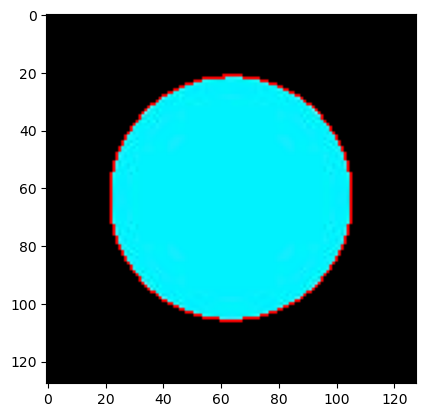

In [254]:
replaceColor(masked, borderCircle, (255,0,0))

In [255]:
print(chainCircle)

[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 7, 7, 0, 7, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


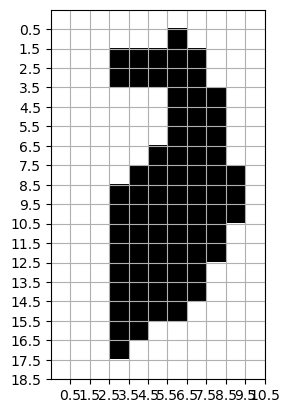

In [ ]:
plt.imshow(test, cmap='binary')
plt.grid(True)
plt.xticks(np.arange(0.5, test.shape[1]+0.5, 1))
plt.yticks(np.arange(0.5, test.shape[0]+0.5, 1))
plt.show()

In [ ]:
plt.imshow(re, cmap='binary')
plt.grid(True)
plt.xticks(np.arange(0.5, test.shape[1]+0.5, 1))
plt.yticks(np.arange(0.5, test.shape[0]+0.5, 1))
plt.show()

In [ ]:
print(primer1(binary))
liscontorno = bettle(primer1(binary), binary)
print(liscontorno)
replaceColor(masked, liscontorno, (0,245,26))

In [ ]:
image2 = cv2.imread('imagenesPruebas/formas.png')
imgGray = rgb2gray(image2)
binary = thresholdOtsu(imgGray)
n = 8
kernel = np.ones((n,n),np.uint8) 
binary = cv2.dilate(binary, kernel, iterations = 1)
binary = ErosionBin(binary, 7)
masked = np.zeros_like(image2)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(image2.shape[1]):
    for j in range(image2.shape[0]):
        if 1-binary[j, i] == 0:
            masked[j, i, :] = image2[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image2)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()

In [ ]:
print(primer1(bordes_detectados))    
liscontorno = bettle(primer1(binary), bordes_detectados)
print(liscontorno)
replaceColor(masked, liscontorno, ( 0, 245, 26 ))    

In [ ]:
image = alpha2rgb('imagenesPruebas/circle.png')
imgGray = rgb2gray(image)
binary = thresholdOtsu(imgGray)
masked = np.zeros_like(image)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(binary.shape[1]):
    for j in range(binary.shape[0]):
        if binary[j, i] == 0:
            masked[j, i, :] = image[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()

In [ ]:
def on_image_border(currentP, imgBinaria):
    if currentP[0] == 0 or currentP[0] == imgBinaria.shape[0] - 1:
        return True
    if currentP[1] == 0 or currentP[1] == imgBinaria.shape[1] - 1:
        return True
    return False

def FreemanChain(imgBinaria, conexion, stop_condition):
    start = primer1(imgBinaria)
    currentP = start
    chainResult = []
    border = []
    result = np.zeros_like(imgBinaria)
    result[start] = 1

    if conexion == 8:
        directions = [3, 2, 1, 4, 0, 5, 6, 7]
        movimiento = [(-1, -1),(-1, 0),(-1, 1), (0, -1), (0,1), (1, -1),(1, 0), (1, 1)]
    elif conexion == 4:
        directions = [ 1, 2, 0, 3]
        movimiento = [ (-1, 0), (0, -1), (0,1), (1, 0)]

    while True:
        added_to_chain = False

        for direction, mov in zip(directions, movimiento):
            next_mov = (currentP[0] + mov[0], currentP[1] + mov[1])

            if 0 <= next_mov[0] < imgBinaria.shape[0] and 0 <= next_mov[1] < imgBinaria.shape[1]:
                if imgBinaria[next_mov] == 1 and result[next_mov] == 0:
                    border.append(next_mov)
                    chainResult.append(direction)
                    currentP = next_mov
                    result[next_mov] = 1
                    added_to_chain = True

        if not added_to_chain or stop_condition(currentP, imgBinaria):
            return border, chainResult


In [ ]:
border, chain = FreemanChain(binary, 8, on_image_border)

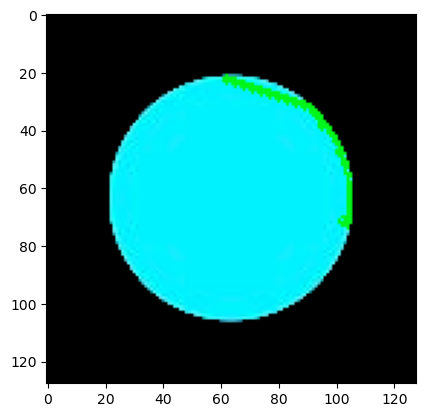

In [ ]:
replaceColor(masked, border, (0,245,26))